<a href="https://colab.research.google.com/github/mr-arpg/PlasmaNetwork/blob/main/PetriNet_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# drive.mount('/content/gdrive', force_remount=True)

## Import sys to recognize the folders

In [ ]:
import sys
from importlib import reload  # Py3 only; unneeded in py2

folder_machine_learning = '/content/gdrive/My Drive/Work/ML/MachineLearning4/'

sys.path.append(folder_machine_learning)

## Check each file in the folder MachineLearning4

### 01_densities.py
- takes a chemFinalDensities file in .txt format, reads it and builds a pandas data frame with normalized species densities (independently for wall and volume species); creates the densities.csv file

- Ignores the children species (vibrations)

In [ ]:
# show the code in the densities.py file
path_to_file = folder_machine_learning + '01_densities.py'

!cat "$path_to_file"

import os
import sys
import pandas as pd

# -----------------------------------------------------------------------------

folder = os.path.join('..', 'Chem_scheme10', 'CSX-H5_P130_I20')

if len(sys.argv) > 1:
    folder = sys.argv[1]

# -----------------------------------------------------------------------------

fname = os.path.join(folder, 'chemFinalDensities.txt')
print('Reading:', fname)
f = open(fname, 'r')

density = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue

    if line.startswith('*'):
        continue
    if line.startswith('Species'):
        continue
    if line.startswith('-'):
        continue
    if ('[' in line) and ('%]' in line):
        continue
    if line.startswith('|'):
        continue

    parts = line.split()
    name = parts[0]
    if ',' in name:
        name = name.split('(')[0] + name.split('(')[1].split(',')[0]
    else:
        name = name.split('(')[0]
    value = float(parts[1])
    if name not in density:


In [ ]:
import os
import sys
import pandas as pd

# -----------------------------------------------------------------------------

folder = os.path.join('/content/gdrive/My Drive/Work/ML', 'CSX-H5_P130_I20/')

print(folder)


/content/gdrive/My Drive/Work/ML/CSX-H5_P130_I20/


In [ ]:

# -----------------------------------------------------------------------------

fname = os.path.join(folder, 'chemFinalDensities.txt')
print(fname)
print('Reading:', fname)
f = open(fname, 'r')

density = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue

    if line.startswith('*'):
        continue
    if line.startswith('Species'):
        continue
    if line.startswith('-'):
        continue
    if ('[' in line) and ('%]' in line):
        continue
    if line.startswith('|'):
        continue

    parts = line.split()
    name = parts[0]
    if ',' in name:
        name = name.split('(')[0] + name.split('(')[1].split(',')[0]
    else:
        name = name.split('(')[0]
    value = float(parts[1])

    if name not in density:
        density[name] = 0.
    density[name] += value

print(density)
f.close()



/content/gdrive/My Drive/Work/ML/CSX-H5_P130_I20/chemFinalDensities.txt
Reading: /content/gdrive/My Drive/Work/ML/CSX-H5_P130_I20/chemFinalDensities.txt
{'H2': 7.4216808593796e+20, 'H2+': 32421936727.3397, 'H': 1.0721237981725688e+21, 'H+': 400144897887.504, 'N2': 2.412187291108535e+22, 'N2+': 525589796676.26886, 'N': 3.644966532339641e+20, 'N+': 30238057469.298, 'NH3': 6.173470700503e+17, 'NH3+': 37980225080147.3, 'NH2': 312501334814911.0, 'NH2+': 3386688172752.52, 'NH2-': 177326719997716.0, 'NH': 3.88684268343694e+16, 'NH+': 42526334779.1877, 'H3+': 3550717376075.69, 'N4+': 4850413178.04765, 'N3+': 2313114256094.67, 'N2H+': 6053463778479380.0, 'NH4+': 724327547500034.0, 'N2H2': 31209786352235.5, 'N2H3': 503322546408.441, 'N2H4': 58829532.1315663, 'wall_F': 9.9741815480648e+19, 'wall_N': 1.184205018935822e+16, 'wall_H': 2.3130563277099098e+17, 'wall_S': 1202573264426.34, 'wall_NH': 9228739036692270.0, 'wall_NH2': 842851031708.142}


In [ ]:
# -----------------------------------------------------------------------------

total_1 = sum([density[name] for name in density if 'wall' not in name])
total_2 = sum([density[name] for name in density if 'wall' in name])

for name in density:
    if 'wall' not in name:
        density[name] /= total_1
    else:
        density[name] /= total_2

# -----------------------------------------------------------------------------

density = pd.Series(density, name='density').to_frame()
density.index.name = 'species'
density = density.sort_index()

fname = 'densities.csv'
print('Writing:', fname)
density.to_csv(fname)


### 02_fractions.py
- reads the previously generated densities.csv;
reads and input file .in;
searches through the .in file for the fraction section and extracts initial fractions for each chemical species, separating them from wall and volume species. Also verifies that the sum is 1.

Creates a fractions.csv file containing the initial fractions of each species, sorted alphabetically

In [ ]:
# show the code in the fractions.py file
path_to_file = folder_machine_learning + '02_fractions.py'

!cat "$path_to_file"

NameError: name 'folder_machine_learning' is not defined

### 03_reactions.py
- Reads and processes chemical reaction definitions from a .chem file;

- Converts these reactions into a structured format for analysis - reactions.csv

In [ ]:
# show the code in the reactions.py file
path_to_file = folder_machine_learning + '03_reactions.py'

!cat "$path_to_file"

import os
import sys
import glob
import pandas as pd

# -----------------------------------------------------------------------------

folder = os.path.join('..', 'Chem_scheme10', 'CSX-H5_P130_I20')

if len(sys.argv) > 1:
    folder = sys.argv[1]

# -----------------------------------------------------------------------------

def to_str_special(reactants, products):


# -----------------------------------------------------------------------------


# -----------------------------------------------------------------------------

def to_str(reaction):
    reactants = []
    products = []
    for (name, number) in reaction.items():
        if number == 0.:
            continue
        if number == -1.:
            reactants.append(name)
            continue
        if number == 1.:
            products.append(name)
            continue
        if number == int(number):
            if number < 0.:
                reactants.append(str(int(-number)) + '*' + name)
                continue
  

### 04_weights.py
- Uses machine learning (TensorFlow) to analyze chemical reactions and determine their relative importance;
- Calculates weights for each reaction based on their contribution to the final species densities
Inputs:
- densities.csv (final species densities)
- fractions.csv (initial species fractions)
- reactions.csv (reaction definitions)
Output:
- Creates weights.csv containing:
    - Each reaction as a row
    - A weight value indicating the reaction's importance
    - Sorted by weight in descending order

In [ ]:
# show the code in the weights.py file
path_to_file = folder_machine_learning + '04_weights.py'

!cat "$path_to_file"

cat: '/content/gdrive/My Drive/Work/ML/CS17/04_weights.py': No such file or directory


### 05_petrinet.py
- Creates a visual representation (Petri net) of the chemical reaction network;
- Uses the reaction weights to highlight important reactions
- outputs petrinet.png

In [ ]:
path_to_file = folder_machine_learning + '05_petrinet.py'

!cat "$path_to_file"

import os
import pandas as pd
import pygraphviz as pgv

# -----------------------------------------------------------------------------

fname = 'reactions.csv'
print('Reading:', fname)
reactions = pd.read_csv(fname, index_col='reaction')

# -----------------------------------------------------------------------------

fname = 'weights.csv'
print('Reading:', fname)
weights = pd.read_csv(fname, index_col='reaction')

# -----------------------------------------------------------------------------

G = pgv.AGraph(name='reactions',
               directed=True,
               strict=False,
               splines='ortho',
               forcelabels=True,
               nodesep=0.25)

# -----------------------------------------------------------------------------

for species in reactions.columns:
    G.add_node(species, label=species, fontsize=18,  xlabel='', shape='circle',
               fixedsize=True, width=1.25, height=1.25)

# ----------------------------------------------------------

### 06_graph.py
- Creates a species-centric visualization of the chemical reaction network
- Focuses on direct connections between species, filtered by reaction importance
- Outputs graph.png

In [ ]:
path_to_file = folder_machine_learning + '06_graph.py'

!cat "$path_to_file"

cat: '/content/gdrive/My Drive/Work/ML/CS17/06_graph.py': No such file or directory


### 07_losses.py
Plot the loss

In [ ]:
path_to_file = folder_machine_learning + '07_losses.py'

!cat "$path_to_file"

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------

A = [[ 0,  0,  2, -2, -1, -1, -1,  0],
     [ 0,  0, -1,  1,  0,  0,  0,  0],
     [ 2, -2,  0,  0, -1,  0,  0, -1],
     [-1,  1,  0,  0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  1, -1,  0,  1],
     [ 0,  0,  0,  0,  0,  1, -1,  1],
     [ 0,  0,  0,  0,  0,  0,  1, -1]]

A = np.array(A)

#print(A)

# -----------------------------------------------------------------------------

b = [[0],
     [2],
     [0],
     [2],
     [0],
     [0],
     [0]]

b = np.array(b)

#print(b)

# -----------------------------------------------------------------------------

x = [[1],
     [0],
     [2],
     [0],
     [1],
     [1],
     [1],
     [0]]

x = np.array(x)

#print(x)

# -----------------------------------------------------------------------------

y = np.matmul(A, x) + b

#print(y)

# ----------------------------------------------------------------------------

## Data Analysis

In [ ]:
folder_machine_learning = '/content/gdrive/My Drive/Work/ML/CS17/'


In [ ]:
import pandas as pd
path_to_file = folder_machine_learning + 'densities.csv'


df_densities = pd.read_csv(path_to_file)
print(df_densities.head())
print("Species: ", df_densities.species.unique())
print(df_densities.shape)

  species       density
0       H  6.286736e-03
1      H+  8.603625e-11
2      H-  7.560130e-11
3      H2  4.552255e-02
4     H2+  2.510381e-11
Species:  ['H' 'H+' 'H-' 'H2' 'H2+' 'H3+' 'N' 'N+' 'N2' 'N2+' 'N2H' 'N2H+' 'N2H2'
 'N2H3' 'N2H4' 'N3+' 'N4+' 'NH' 'NH+' 'NH2' 'NH2+' 'NH2-' 'NH3' 'NH3+'
 'NH4+' 'wall_F' 'wall_H' 'wall_N' 'wall_NH' 'wall_NH2' 'wall_S']
(31, 2)


In [ ]:
path_to_file = folder_machine_learning + 'fractions.csv'

df_fractions = pd.read_csv(path_to_file)
print(df_fractions.head())

  species  fraction
0       H     0.045
1      H+     0.000
2      H2     0.005
3     H2+     0.000
4     H3+     0.000


In [ ]:
path_to_file = folder_machine_learning + 'weights.csv'

df_weights = pd.read_csv(path_to_file)
print(df_weights)

                                       reaction    weight
0                                    wall_S ->   2.128122
1    wall_H + wall_NH2 -> NH3 + wall_F + wall_S  2.058517
2                          N + wall_S -> wall_N  1.740169
3                          H + wall_S -> wall_H  1.654681
4         wall_H + wall_NH -> wall_F + wall_NH2  1.313189
..                                          ...       ...
194                      NH + wall_S -> wall_NH -1.793505
195                       H + wall_N -> wall_NH -1.860688
196                NH2 + wall_H -> NH3 + wall_S -2.038720
197                    NH2 + wall_S -> wall_NH2 -2.263590
198                     NH + wall_H -> wall_NH2 -2.555407

[199 rows x 2 columns]


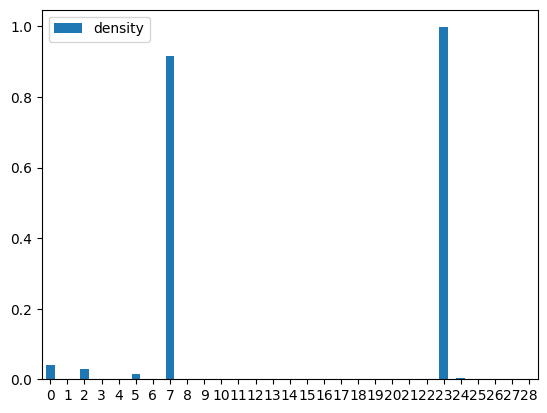

In [ ]:
ax_densities = df_densities.plot.bar(y=df_densities.columns[1], rot=0)

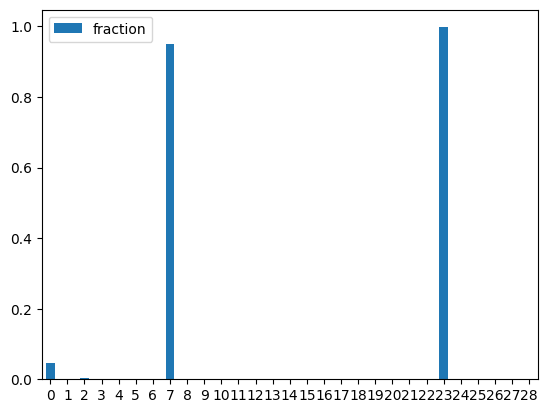

In [ ]:
ax_fractions = df_fractions.plot.bar(y=df_fractions.columns[1], rot=0)

In [ ]:
print(df_fractions.iloc[23])

species     wall_F
fraction    0.9976
Name: 23, dtype: object


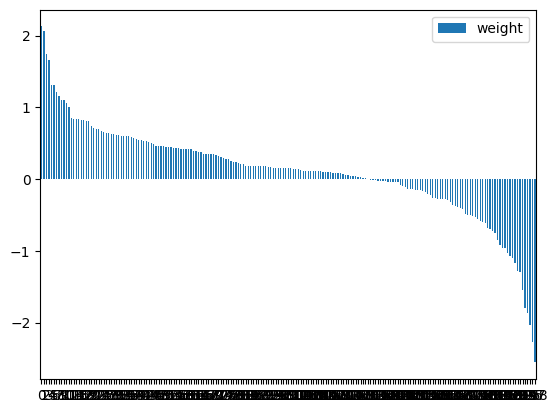

In [ ]:
ax_weights = df_weights.plot.bar(y=df_weights.columns[1], rot=0)

In [ ]:
path_to_file = folder_machine_learning + 'reactions.csv'
df_reactions = pd.read_csv(path_to_file)
print(df_reactions.head())

               reaction    H   H+   H2  H2+  H3+    N   N+   N2  N2+  ...  \
0             2*H -> H2 -2.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1             2*N -> N2  0.0  0.0  0.0  0.0  0.0 -2.0  0.0  1.0  0.0  ...   
2            2*N -> N2+  0.0  0.0  0.0  0.0  0.0 -2.0  0.0  0.0  1.0  ...   
3           2*N2 -> N4+  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.0  0.0  ...   
4  2*N2H3 -> N2 + 2*NH3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   

   NH2-  NH3  NH3+  NH4+  wall_F  wall_H  wall_N  wall_NH  wall_NH2  wall_S  
0   0.0  0.0   0.0   0.0     0.0     0.0     0.0      0.0       0.0     0.0  
1   0.0  0.0   0.0   0.0     0.0     0.0     0.0      0.0       0.0     0.0  
2   0.0  0.0   0.0   0.0     0.0     0.0     0.0      0.0       0.0     0.0  
3   0.0  0.0   0.0   0.0     0.0     0.0     0.0      0.0       0.0     0.0  
4   0.0  2.0   0.0   0.0     0.0     0.0     0.0      0.0       0.0     0.0  

[5 rows x 30 columns]


## Chemical Reactions Analysis using ML (04_weights.py)

### 04_weights.py - MachineLearning4

The above Code in a while true cycle - this cycle is one broken if the loss is below 1e-6. If this condition is not achieved, X is reinitialized and the training process restarts

In [ ]:
folder_machine_learning = '/content/gdrive/My Drive/Work/ML/CS17/'


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import pandas as pd
import tensorflow as tf

# -----------------------------------------------------------------------------

fname = 'densities.csv'
print('Reading:', fname)
densities = pd.read_csv(folder_machine_learning+fname, index_col='species')

species = densities.index

# -----------------------------------------------------------------------------

fname = 'fractions.csv'
print('Reading:', fname)
fractions = pd.read_csv(folder_machine_learning+fname, index_col='species')

assert list(fractions.index) == list(densities.index)

# -----------------------------------------------------------------------------

fname = 'reactions.csv'
print('Reading:', fname)
reactions = pd.read_csv(folder_machine_learning+fname, index_col='reaction')

assert list(reactions.columns) == list(densities.index)

# -----------------------------------------------------------------------------


Reading: densities.csv
Reading: fractions.csv
Reading: reactions.csv


In [ ]:
A = reactions.values.T
B = fractions['fraction'].values
Y = densities['density'].values

A = tf.constant(A, dtype=tf.float64)
B = tf.constant(B, dtype=tf.float64)
Y = tf.constant(Y, dtype=tf.float64)

print('A:', A.shape, A.dtype)
print('B:', B.shape, B.dtype)
print('Y:', Y.shape, Y.dtype)

# -----------------------------------------------------------------------------

wall = np.array(['wall' in name for name in species])

print(' '.join(list(species[~wall])))
print(' '.join(list(species[wall])))

# -----------------------------------------------------------------------------

@tf.function
def model(X):
    Y_true_1 = tf.boolean_mask(Y, ~wall)
    Y_true_2 = tf.boolean_mask(Y, wall)

    # Y_pred = tf.tensordot(A, tf.nn.relu(X), axes=1) + B
    Y_pred = tf.tensordot(A, X, axes=1) + B

    Y_pred_1 = tf.boolean_mask(Y_pred, ~wall)
    Y_pred_2 = tf.boolean_mask(Y_pred, wall)

    Y_pred_1 = tf.nn.softmax(Y_pred_1)
    Y_pred_2 = tf.nn.softmax(Y_pred_2)

    loss = tf.math.reduce_sum(Y_true_1 * tf.math.log(Y_true_1 / Y_pred_1)) + \
           tf.math.reduce_sum(Y_true_2 * tf.math.log(Y_true_2 / Y_pred_2))

    return loss

# -----------------------------------------------------------------------------

all_losses = []
all_weights = []

train = True
while train:

    min_loss = np.inf

    # Initialize X with 1/sqrt(n)
    init = tf.constant(1.0 / np.sqrt(A.shape[-1]), shape=(A.shape[-1],), dtype=tf.float64)
    X = tf.Variable(init)
    loss = model(X).numpy()
    print('\rInitializing: %.3e' % loss, end=' ')
    min_loss = loss
    min_weights = X.value()


    # -----------------------------------------------------------------------------

    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

    @tf.function
    def train():
        with tf.GradientTape() as tape:
            tape.watch(X)
            loss = model(X)
        grads = tape.gradient(loss, X)
        opt.apply_gradients(zip([grads], [X]))
        return loss

    # -----------------------------------------------------------------------------

    print('%10s %12s' % ('epoch', 'loss'))

    epochs = 200000
    losses = []

    min_loss = np.inf
    min_epoch = 0


    try:
        for epoch in range(epochs):
            loss = train().numpy()
            print('\r%10d %12.3e' % (epoch, loss), end=' ')
            losses.append(loss)

            if loss < min_loss:
                min_loss = loss
                min_epoch = epoch
                min_weights = X.value()

            if np.isnan(loss) or np.isinf(loss):
                break

    except KeyboardInterrupt:
        break

    finally:
        print('\r%10d %12.3e' % (min_epoch, min_loss))

    # -----------------------------------------------------------------------------

    if min_loss < 1e-6:

        losses = np.array(losses)
        all_losses.append(losses)
        losses = np.mean(all_losses, axis=0)

        fname = 'losses.npy'
        print('Writing:', fname)
        np.save(folder_machine_learning+fname, losses)

        # -----------------------------------------------------------------------------

        weights = min_weights.numpy()
        all_weights.append(weights)
        weights = np.mean(all_weights, axis=0)

        weights = pd.Series(data=weights, index=reactions.index, name='weight').to_frame()
        weights.index.name = 'reaction'
        weights = weights.sort_values('weight', ascending=False)
        print(weights)

        fname = 'weights.csv'
        print('Writing:', fname)
        weights.to_csv(folder_machine_learning+fname)

        train = False

A: (31, 199) <dtype: 'float64'>
B: (31,) <dtype: 'float64'>
Y: (31,) <dtype: 'float64'>
H H+ H- H2 H2+ H3+ N N+ N2 N2+ N2H N2H+ N2H2 N2H3 N2H4 N3+ N4+ NH NH+ NH2 NH2+ NH2- NH3 NH3+ NH4+
wall_F wall_H wall_N wall_NH wall_NH2 wall_S
Initializing: 2.364e+00      epoch         loss
    199999    1.417e-07
Writing: losses.npy
                                              weight
reaction                                            
wall_S ->                                   2.128122
wall_H + wall_NH2 -> NH3 + wall_F + wall_S  2.058517
N + wall_S -> wall_N                        1.740169
H + wall_S -> wall_H                        1.654681
wall_H + wall_NH -> wall_F + wall_NH2       1.313189
...                                              ...
NH + wall_S -> wall_NH                     -1.793505
H + wall_N -> wall_NH                      -1.860688
NH2 + wall_H -> NH3 + wall_S               -2.038720
NH2 + wall_S -> wall_NH2                   -2.263590
NH + wall_H -> wall_NH2                  

### Plot the Loss

Reading: losses.npy


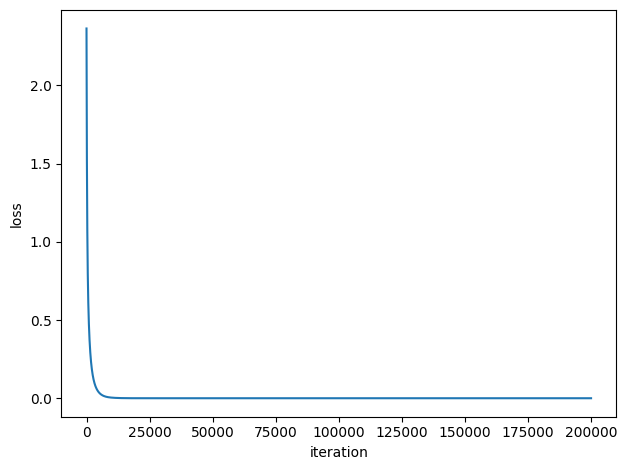

In [ ]:
import matplotlib.pyplot as plt

fname = 'losses.npy'
print('Reading:', fname)

losses = np.load(folder_machine_learning+fname)

plt.xlabel('iteration')
plt.ylabel('loss')

plt.plot(losses[:epochs])

plt.tight_layout()
plt.show()

### Find Mechanisms

In [ ]:
# escrever num ficheiro todos os caminhos

out = ""

df_weights = pd.read_csv(folder_machine_learning+"weights.csv")
reactions = df_weights["reaction"].tolist()

df_reactions = pd.read_csv(folder_machine_learning+"reactions.csv")

# List of reactions
species = df_reactions.columns.tolist()[1:]

for specie in species:

    out += "Reactions where " + specie + " is destroyed:\n"

    for reaction in reactions:
        products, reactants  = reaction.split("->")

        if(specie in reactants):

            out += reaction + "\n"

f = open(folder_machine_learning+"mechanisms.txt", "w")
f.write(out)
f.close()


Possible next steps:


*   Add Early stopping - stop training when the loss stops evolving
*   Update known variables, y and A using recent simulations and chemical schemes
*   Test the obtained reduced scheme on LoKI
*   Initialize X variable with known rates (from literature or previous LoKI simulations)
*   Apply other physical constraints (for instance, impose a range for certain rates)
*   Think about ways to incorporate several input conditions (p, %H2, I) in this machine learning approach



## Using CS17

Run the algorithm with the most recent chemical scheme updates

### 01_densities.py

In [ ]:
inputs_CS17_folder = '/content/gdrive/My Drive/Work/ML/CS17/'


In [ ]:
import os
import sys
import pandas as pd

# -----------------------------------------------------------------------------

folder = os.path.join(inputs_CS17_folder, 'CS17_P130_I20_Q5_H5/')

print(folder)

/content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/


In [ ]:

# -----------------------------------------------------------------------------

fname = os.path.join(folder, 'chemFinalDensities.txt')
print(fname)
print('Reading:', fname)
f = open(fname, 'r')

density = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue

    if line.startswith('*'):
        continue
    if line.startswith('Species'):
        continue
    if line.startswith('-'):
        continue
    if ('[' in line) and ('%]' in line):
        continue
    if line.startswith('|'):
        continue

    parts = line.split()
    name = parts[0]
    if ',' in name:
        name = name.split('(')[0] + name.split('(')[1].split(',')[0]
    else:
        name = name.split('(')[0]
    value = float(parts[1])

    if name not in density:
        density[name] = 0.
    density[name] += value

print(density)
f.close()


/content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/chemFinalDensities.txt
Reading: /content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/chemFinalDensities.txt
{'H2': 1.03290245726218e+21, 'H2+': 569603186104.86, 'H': 1.4264547590636377e+20, 'H+': 1952154877949.99, 'H-': 1715386624977.24, 'N2': 2.055518021048187e+22, 'N2+': 30859839207974.402, 'N': 9.572411648442123e+20, 'N+': 10200385997847.1, 'NH3': 1.89631414442614e+18, 'NH3+': 53819391406555.2, 'NH2': 677924668089686.0, 'NH2+': 4121326443704.51, 'NH2-': 5342778119982.28, 'NH': 3.94232013670011e+16, 'NH+': 818505451920.551, 'H3+': 225649807735.13, 'N3+': 9602178489294.37, 'N4+': 126225581980.445, 'N2H': 5652279801751.41, 'N2H+': 3170932680105550.0, 'NH4+': 631003216451635.0, 'N2H2': 310594365103259.0, 'N2H3': 8296948342493.89, 'N2H4': 333583216.942998, 'wall_F': 9.97999669695536e+19, 'wall_N': 4.383747336277966e+16, 'wall_H': 1.556008857726862e+17, 'wall_S': 590826420978812.0, 'wall_NH': 2138895041608.17, 'wall_NH2': 1604

In [ ]:
# -----------------------------------------------------------------------------

total_1 = sum([density[name] for name in density if 'wall' not in name])
total_2 = sum([density[name] for name in density if 'wall' in name])

for name in density:
    if 'wall' not in name:
        density[name] /= total_1
    else:
        density[name] /= total_2

# -----------------------------------------------------------------------------

density = pd.Series(density, name='density').to_frame()
density.index.name = 'species'
density = density.sort_index()

fname = 'densities.csv'
print('Writing:', fname)
density.to_csv(fname)


Writing: densities.csv


In [ ]:
import pandas as pd
path_to_file = 'densities.csv'


df_densities = pd.read_csv(path_to_file)
print(df_densities.head())
print("Species: ", df_densities.species.unique())
print(df_densities.shape)

  species       density
0       H  6.286736e-03
1      H+  8.603625e-11
2      H-  7.560130e-11
3      H2  4.552255e-02
4     H2+  2.510381e-11
Species:  ['H' 'H+' 'H-' 'H2' 'H2+' 'H3+' 'N' 'N+' 'N2' 'N2+' 'N2H' 'N2H+' 'N2H2'
 'N2H3' 'N2H4' 'N3+' 'N4+' 'NH' 'NH+' 'NH2' 'NH2+' 'NH2-' 'NH3' 'NH3+'
 'NH4+' 'wall_F' 'wall_H' 'wall_N' 'wall_NH' 'wall_NH2' 'wall_S']
(31, 2)


### 02_fractions.py

In [ ]:
import os
import sys
import glob
import pandas as pd
# -----------------------------------------------------------------------------

inputs_CS17_folder = '/content/gdrive/My Drive/Work/ML/CS17/'

folder = os.path.join(inputs_CS17_folder, 'CS17_P130_I20_Q5_H5/')

print(folder)

/content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/


In [ ]:
fname = 'densities.csv'
print('Reading:', fname)
densities = pd.read_csv(inputs_CS17_folder+fname, index_col='species')

species = densities.index

# -----------------------------------------------------------------------------

path = os.path.join(folder, 'Input', '*.in')
files = sorted(glob.glob(path))

print(folder)
if len(files) == 0:
    print('Missing input file:', path)
    exit()

if len(files) > 1:
    print('Warning: multiple input files')

# -----------------------------------------------------------------------------

fname = files[0]
print('Reading:', fname)
f = open(fname, 'r')


Reading: densities.csv
/content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/
Reading: /content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/Input/P130_I20_Q5_H5.in


In [ ]:
for line in f:
    if 'chemistry:' in line:
        break

for line in f:
    if 'gasProperties:' in line:
        break

for line in f:
    if 'fraction:' in line:
        break

fraction = {name: 0. for name in species}

for line in f:
    parts = line.strip().split()
    if parts[0] == '-':
        name = parts[1]
        value = float(parts[3])
        fraction[name] = value
    else:
        break

f.close()

# --------------------

print(fraction)

{'H': 0.005, 'H+': 0.0, 'H-': 0.0, 'H2': 0.045, 'H2+': 0.0, 'H3+': 0.0, 'N': 0.0, 'N+': 0.0, 'N2': 0.95, 'N2+': 0.0, 'N2H': 0.0, 'N2H+': 0.0, 'N2H2': 0.0, 'N2H3': 0.0, 'N2H4': 0.0, 'N3+': 0.0, 'N4+': 0.0, 'NH': 0.0, 'NH+': 0.0, 'NH2': 0.0, 'NH2+': 0.0, 'NH2-': 0.0, 'NH3': 0.0, 'NH3+': 0.0, 'NH4+': 0.0, 'wall_F': 0.998, 'wall_H': 0.001, 'wall_N': 0.0005, 'wall_NH': 0.0005, 'wall_NH2': 0.0, 'wall_S': 0.0}


In [ ]:
#---------------------------------------------------------

assert round(sum([fraction[name] for name in fraction if 'wall' not in name]),5) == 1.
assert round(sum([fraction[name] for name in fraction if 'wall' in name]),5) == 1.


NameError: name 'fraction' is not defined

In [ ]:
# -----------------------------------------------------------------------------

fraction = pd.Series(fraction, name='fraction').to_frame()
fraction.index.name = 'species'
fraction = fraction.sort_index()
print(fraction)

fname = 'fractions.csv'
print('Writing:', fname)
fraction.to_csv(fname)

          fraction
species           
H           0.0050
H+          0.0000
H-          0.0000
H2          0.0450
H2+         0.0000
H3+         0.0000
N           0.0000
N+          0.0000
N2          0.9500
N2+         0.0000
N2H         0.0000
N2H+        0.0000
N2H2        0.0000
N2H3        0.0000
N2H4        0.0000
N3+         0.0000
N4+         0.0000
NH          0.0000
NH+         0.0000
NH2         0.0000
NH2+        0.0000
NH2-        0.0000
NH3         0.0000
NH3+        0.0000
NH4+        0.0000
wall_F      0.9980
wall_H      0.0010
wall_N      0.0005
wall_NH     0.0005
wall_NH2    0.0000
wall_S      0.0000
Writing: fractions.csv


### 03_reactions.py

In [ ]:

import os
import sys
import glob
import pandas as pd
# -----------------------------------------------------------------------------

inputs_CS17_folder = '/content/gdrive/My Drive/Work/ML/CS17/'

folder = os.path.join(inputs_CS17_folder, 'CS17_P130_I20_Q5_H5/')

print(folder)


/content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/


In [ ]:

def to_str(reaction):
    reactants = []
    products = []
    for (name, number) in reaction.items():
        if number == 0.:
            continue
        if number == -1.:
            reactants.append(name)
            continue
        if number == 1.:
            products.append(name)
            continue
        if number == int(number):
            if number < 0.:
                reactants.append(str(int(-number)) + '*' + name)
                continue
            if number > 0.:
                products.append(str(int(number)) + '*' + name)
                continue
        else:
            if number < 0.:
                reactants.append(str(-number) + '*' + name)
                continue
            if number > 0.:
                products.append(str(number) + '*' + name)
                continue
    return ' + '.join(reactants) + ' -> ' + ' + '.join(products)

# -----------------------------------------------------------------------------

fname = 'densities.csv'
print('Reading:', fname)
densities = pd.read_csv(inputs_CS17_folder+fname, index_col='species')

species = densities.index

# -----------------------------------------------------------------------------

path = os.path.join(folder, 'Input', 'Nitrogen_Hydrogen', '*.chem')
files = sorted(glob.glob(path))

if len(files) == 0:
    print('Not found:', path)
    exit()

if len(files) > 1:
    print('Warning: multiple files available')

# -----------------------------------------------------------------------------

fname = files[0]
print('Reading:', fname)
f = open(fname, 'r')

data = []
index = []

for line in f:

    line = line.strip()
    if len(line) == 0:
        continue
    if line.startswith('%'):
        continue

    line = line.split('|')[0].strip()
    line = line.replace(')->', ') ->')

    parts = line.split()
    for i, part in enumerate(parts):
        if '(' in part:
            base = part.split('(')[0]
            if ',' in part:
                plus = part.split('(')[1].split(',')[0]
            else:
                plus = part.split('(')[1].split(')')[0]
            if plus in ['+', '-']:
                parts[i] = base + plus
            else:
                parts[i] = base

    print(parts)
    exit()

    # -----------------------------------------------------------------------------

    reactants = dict()
    arrow = None
    products = dict()

    for part in parts:
        if part == '+':
            continue
        if part in ['->', '<->']:
            arrow = part
            continue

        n_prefix = len(part) - len(part.lstrip('.0123456789'))
        if n_prefix == 0:
            name = part
            number = 1.
        else:
            name = part[n_prefix:]
            number = float(part[:n_prefix])

        if name not in species:
            continue

        if arrow is None:
            if name not in reactants:
                reactants[name] = 0.
            reactants[name] += number
        else:
            if name not in products:
                products[name] = 0.
            products[name] += number

    # -----------------------------------------------------------------------------

    if (len(reactants) == 0) or (len(products) == 0):
        continue

    if reactants == products:
        print("Continue", reactants)
        continue

    # -----------------------------------------------------------------------------

    if '->' in arrow:
        reaction = {name: 0. for name in species}
        for (name, number) in reactants.items():
            reaction[name] -= number
        for (name, number) in products.items():
            reaction[name] += number
            # Update
            # wall_N(F) + wall_S(v) -> wall_N(S) + wall_F(v)
            if(reaction[name]==0):
                data.append(reaction)
                index.append(to_str(reaction))
        if reaction not in data:
            data.append(reaction)
            index.append(to_str(reaction))
            print('%d: %s' % (len(index), index[-1]))

    if '<-' in arrow:
        reaction = {name: 0. for name in species}
        for (name, number) in reactants.items():
            reaction[name] += number
        for (name, number) in products.items():
            reaction[name] -= number
        if reaction not in data:
            data.append(reaction)
            index.append(to_str(reaction))
            print('%d: %s' % (len(index), index[-1]))

f.close()

# -----------------------------------------------------------------------------

reactions = pd.DataFrame.from_records(data=data, index=index)
reactions.index.name = 'reaction'
reactions = reactions.sort_index()
print(reactions)
print("# of reactions", len(reactions))

reactions = reactions.drop_duplicates()
print("# of unique reactions", len(reactions))

fname = 'reactions.csv'
print('Writing:', fname)
reactions.to_csv(fname)


Reading: densities.csv
Reading: /content/gdrive/My Drive/Work/ML/CS17/CS17_P130_I20_Q5_H5/Input/Nitrogen_Hydrogen/N2H2_CS17_Q5_H5.chem
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e', '+', 'H2']
Continue {'H2': 1.0}
['e', '+', 'H2', '->', 'e

### 04_weights.py

### 05_petrinet.py

In [ ]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [ ]:
folder_machine_learning = '/content/gdrive/My Drive/Work/ML/CS17/'


In [ ]:
import os
import pandas as pd
import pygraphviz as pgv

# -----------------------------------------------------------------------------

fname = 'reactions.csv'
print('Reading:', fname)
reactions = pd.read_csv(folder_machine_learning+fname, index_col='reaction')

# -----------------------------------------------------------------------------

fname = 'weights.csv'
print('Reading:', fname)
weights = pd.read_csv(folder_machine_learning+fname, index_col='reaction')

# -----------------------------------------------------------------------------

G = pgv.AGraph(name='reactions',
               directed=True,
               strict=False,
               splines='ortho',
               forcelabels=True,
               nodesep=0.25)

# -----------------------------------------------------------------------------

for species in reactions.columns:
    G.add_node(species, label=species, fontsize=18,  xlabel='', shape='circle',
               fixedsize=True, width=1.25, height=1.25)

# -----------------------------------------------------------------------------
count = 0
color_1 = 'blue'
color_2 = 'orange'

nodes_to_keep = set()


Reading: reactions.csv
Reading: weights.csv


In [ ]:
print(len(reactions))

print(reactions)

199
                                              H   H+   H-   H2  H2+  H3+    N  \
reaction                                                                        
2*H -> H2                                  -2.0  0.0  0.0  1.0  0.0  0.0  0.0   
2*N -> N2                                   0.0  0.0  0.0  0.0  0.0  0.0 -2.0   
2*N -> N2+                                  0.0  0.0  0.0  0.0  0.0  0.0 -2.0   
2*N2 -> N4+                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2*N2H -> N2 + N2H2                          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                         ...  ...  ...  ...  ...  ...  ...   
wall_H + wall_NH -> wall_F + wall_NH2       0.0  0.0  0.0  0.0  0.0  0.0  0.0   
wall_H + wall_NH2 -> NH3 + wall_F + wall_S  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
wall_H -> H + wall_F                        1.0  0.0  0.0  0.0  0.0  0.0  0.0   
wall_N -> N + wall_F                        0.0  0.0  0.0  0.0  0.0  0.0  1.0   
wall_S ->               

In [ ]:

for reaction in reactions.index:
    print(reaction)
    weight = weights.loc[reaction]['weight']
    print(weight)
    if weight > 0:
        count += 1
        color = color_1
    else:
        color = color_2

    print(color)

    G.add_node(reaction, label='', xlabel='',
               shape='rectangle', style='filled',
               fixedsize=True, width=0.25, height=1.25,
               fillcolor=color, color=color)

    for species in reactions.columns:
        value = reactions.loc[reaction,species]
        if value > 0.:
            G.add_edge(reaction, species, color=color)
            if weight > 0.:
                nodes_to_keep.add(species)
        if value < 0.:
            G.add_edge(species, reaction, color=color)
            if weight > 0.:
                nodes_to_keep.add(species)

# -----------------------------------------------------------------------------

for species in reactions.columns:
    if species in nodes_to_keep:
        G.get_node(species).attr['color'] = color_1
    else:
        G.get_node(species).attr['color'] = "red"
        G.get_node(species).attr['style'] = 'filled'
        print('Warning: dangling species', species)

# -----------------------------------------------------------------------------

fdot = 'petrinet.dot'
print('Writing:', fdot)
G.write(fdot)

# -----------------------------------------------------------------------------

ext = 'pdf'
fout = 'petrinet.' + ext
command = 'dot -T%s %s > %s' % (ext, fdot, fout)

print('Running:', command)
os.system(command)

print('Deleting:', fdot)
os.remove(fdot)


2*H -> H2
1.7660887777476435
blue
2*N -> N2
0.3274765609035072
blue
2*N -> N2+
-1.1529588609598145
orange
2*N2 -> N4+
-0.6863540014363991
orange
2*N2H -> N2 + N2H2
2.557329165135102
blue
2*N2H2 -> N2H + N2H3
-4.2368864076443336e-05
orange
2*N2H3 -> N2 + 2*NH3
-0.27135936710384
orange
2*N2H3 -> N2H2 + N2H4
-0.6882881122496641
orange
2*NH -> 2*H + N2
1.888377070753993
blue
2*NH -> H + N2H
-2.50262996691949
orange
2*NH -> H2 + N2
-0.3940373990794798
orange
2*NH -> N + NH2
-1.7332842182742338
orange
2*NH -> N2H2
-1.1689242170801926
orange
2*NH2 -> H2 + N2H2
-0.224975295209091
orange
2*NH2 -> N2H4
0.3808258737813798
blue
2*NH2 -> NH + NH3
-1.1515015697590083
orange
2*wall_H -> H2 + wall_F + wall_S
-1.03230588936372
orange
2*wall_N -> N2 + wall_F + wall_S
-2.0895710810558112
orange
H + H- -> H2
1.8978553652188543
blue
H + H2 -> H3+
0.384871875240725
blue
H + H2+ -> H+ + H2
-0.6713686457760751
orange
H + N -> NH
-1.625324930941444
orange
H + N+ -> H+ + N
0.5736524796783552
blue
H + N2 -> N2H


### 06_graph.py

In [ ]:
folder_machine_learning = '/content/gdrive/My Drive/Work/ML/CS17/'


In [ ]:
import os
import pandas as pd
import pygraphviz as pgv

# -----------------------------------------------------------------------------

fname = 'reactions.csv'
print('Reading:', fname)
reactions = pd.read_csv(folder_machine_learning+fname, index_col='reaction')

# -----------------------------------------------------------------------------

fname = 'weights.csv'
print('Reading:', fname)
weights = pd.read_csv(folder_machine_learning+fname, index_col='reaction')

# -----------------------------------------------------------------------------

G = pgv.AGraph(name='species', directed=True, strict=False)

# -----------------------------------------------------------------------------

colors = dict()

colors['H']        = ('greens9', '5')
colors['H2']       = ('greens9', '6')
colors['H3']       = ('greens9', '7')

colors['N']        = ('blues9', '4')
colors['N2']       = ('blues9', '5')
colors['N3']       = ('blues9', '6')
colors['N4']       = ('blues9', '7')

colors['NH']       = ('oranges9', '4')
colors['NH2']      = ('oranges9', '5')
colors['NH3']      = ('oranges9', '6')
colors['NH4']      = ('oranges9', '7')

colors['N2H']      = ('rdpu9', '4')
colors['N2H2']     = ('rdpu9', '5')
colors['N2H3']     = ('rdpu9', '6')
colors['N2H4']     = ('rdpu9', '7')

colors['wall_H']   = ('greens9', '5')
colors['wall_N']   = ('blues9', '4')
colors['wall_NH']  = ('oranges9', '4')
colors['wall_NH2'] = ('oranges9', '5')
colors['wall_F']   = ('accent4', '2')
colors['wall_S']   = ('brbg9', '3')

# -----------------------------------------------------------------------------

for species in reactions.columns:
    base = species
    if base[-1] in ['+', '-']:
        base = base[:-1]
    (colorscheme, color) = colors[base]
    G.add_node(species, label=species, fontsize=14,
               shape='circle', style='filled',
               width=1., height=1., fixedsize=True,
               colorscheme=colorscheme, color=color)

# -----------------------------------------------------------------------------

edges = dict()

for idx, row in reactions.iterrows():
    weight = weights.loc[idx]['weight']
    reactants = row[row < 0.].index.values
    products  = row[row > 0.].index.values
    for reactant in reactants:
        for product in products:
            if reactant == product:
                continue
            if (reactant, product) not in edges:
                edges[(reactant, product)] = False
            if weight > 0.:
                edges[(reactant, product)] = True

# -----------------------------------------------------------------------------

for (a, b) in edges:

    base_a = a
    base_b = b

    if base_a[-1] in ['+', '-']:
        base_a = base_a[:-1]
    if base_b[-1] in ['+', '-']:
        base_b = base_b[:-1]

    colorscheme_a = colors[base_a][0]
    colorscheme_b = colors[base_b][0]

    if edges[(a, b)] > 0.:
        style = 'solid'
        if colorscheme_a == colorscheme_b:
            colorscheme = colorscheme_a
        else:
            colorscheme = 'greys9'
        color = 6
    else:
        style = 'dashed'
        if colorscheme_a == colorscheme_b:
            colorscheme = colorscheme_a
        else:
            colorscheme = 'greys9'
        color = 4
    G.add_edge(a, b, style=style, colorscheme=colorscheme, color=color)

# -----------------------------------------------------------------------------

fdot = 'graph.dot'
print('Writing:', fdot)
G.write(fdot)

# -----------------------------------------------------------------------------

ext = 'pdf'
fout = 'graph.' + ext
command = 'fdp -T%s %s > %s' % (ext, fdot, fout)

print('Running:', command)
os.system(command)

print('Deleting:', fdot)
os.remove(fdot)

Reading: reactions.csv
Reading: weights.csv
Writing: graph.dot
Running: fdp -Tpdf graph.dot > graph.pdf
Deleting: graph.dot


## Tests with Argon, simple scheme

In [2]:
inputs_argon_folder = '/content/gdrive/My Drive/Work/ML/Argon/'


In [3]:
import os
import sys
import pandas as pd

# -----------------------------------------------------------------------------

folder = inputs_argon_folder

print(folder)

/content/gdrive/My Drive/Work/ML/Argon/


In [4]:
import sys
from importlib import reload  # Py3 only; unneeded in py2

sys.path.append(inputs_argon_folder)

### densities.py - changed to read excited states

In [5]:
# -----------------------------------------------------------------------------

fname = os.path.join(folder, 'chemFinalDensities.txt')
print(fname)
print('Reading:', fname)

if not os.path.exists(fname):
    print(f"Error: File not found at {fname}")
else:
    f = open(fname, 'r')

    density = dict()

    for line in f:
        line = line.strip()
        if len(line) == 0:
            continue

        if line.startswith('*'):
            continue
        if line.startswith('Species'):
            continue
        if line.startswith('-'):
            continue
        if ('[' in line) and ('%]' in line):
            continue
        if line.startswith('|'):
            continue

        parts = line.split()

        name = parts[0]
        # if ',' in name:
        #     name = name.split('(')[0] + name.split('(')[1].split(',')[0]
        # else:
        #     name = name.split('(')[0]
        value = float(parts[1])
        print(name,value)
        if name not in density:
            density[name] = 0.
        density[name] += value

    f.close()

    # HARDCORED
    # Add density for 'e' is equal to the ion's density
    density['e'] = density['Ar(+,2P0)']

    print(density)

/content/gdrive/My Drive/Work/ML/Argon/chemFinalDensities.txt
Reading: /content/gdrive/My Drive/Work/ML/Argon/chemFinalDensities.txt
Ar(1S0) 1.37922748567087e+22
Ar(3P2) 1.27377533737821e+18
Ar(3P1) 3286916071311210.0
Ar(3P0) 2.06379640385458e+17
Ar(1P1) 405133987296730.0
Ar(+,2P0) 1.00079502008126e+18
{'Ar(1S0)': 1.37922748567087e+22, 'Ar(3P2)': 1.27377533737821e+18, 'Ar(3P1)': 3286916071311210.0, 'Ar(3P0)': 2.06379640385458e+17, 'Ar(1P1)': 405133987296730.0, 'Ar(+,2P0)': 1.00079502008126e+18, 'e': 1.00079502008126e+18}


In [6]:
# -----------------------------------------------------------------------------

total_1 = sum([density[name] for name in density if 'wall' not in name])
total_2 = sum([density[name] for name in density if 'wall' in name])

for name in density:
    if 'wall' not in name:
        density[name] /= total_1
    else:
        density[name] /= total_2

# -----------------------------------------------------------------------------

density = pd.Series(density, name='density').to_frame()
density.index.name = 'species'
density = density.sort_index()

fname = 'densities.csv'
print('Writing:', fname)
density.to_csv(folder+fname)


Writing: densities.csv


In [7]:
import pandas as pd
path_to_file = 'densities.csv'


df_densities = pd.read_csv(folder+path_to_file)
print(df_densities.head())
print("Species: ", df_densities.species.unique())
print(df_densities.shape)

     species       density
0  Ar(+,2P0)  7.254367e-05
1    Ar(1P1)  2.936656e-08
2    Ar(1S0)  9.997474e-01
3    Ar(3P0)  1.495964e-05
4    Ar(3P1)  2.382555e-07
Species:  ['Ar(+,2P0)' 'Ar(1P1)' 'Ar(1S0)' 'Ar(3P0)' 'Ar(3P1)' 'Ar(3P2)' 'e']
(7, 2)


### fractions.py

In [8]:
import os
import sys
import glob
import pandas as pd

# -----------------------------------------------------------------------------

folder = inputs_argon_folder

print(folder)

fname = 'densities.csv'
print('Reading:', fname)
densities = pd.read_csv(folder+fname, index_col='species')

species = densities.index

# -----------------------------------------------------------------------------

path = os.path.join(folder, '*.in')
files = sorted(glob.glob(path))

print(folder)
if len(files) == 0:
    print('Missing input file:', path)
    exit()

if len(files) > 1:
    print('Warning: multiple input files')

# -----------------------------------------------------------------------------

fname = files[0]
print('Reading:', fname)
f = open(fname, 'r')

/content/gdrive/My Drive/Work/ML/Argon/
Reading: densities.csv
/content/gdrive/My Drive/Work/ML/Argon/
Reading: /content/gdrive/My Drive/Work/ML/Argon/ML-argon_setup.in


In [9]:
for line in f:
    if 'chemistry:' in line:
        break

for line in f:
    if 'gasProperties:' in line:
        break

for line in f:
    # if 'fraction:' in line:
    if 'population:' in line:
        break

fraction = {name: 0. for name in species}

for line in f:
    parts = line.strip().split()
    if parts[0] == '-':
        name = parts[1]
        value = float(parts[3])
        fraction[name] = value
    else:
        break

f.close()

# --------------------

print(fraction)

{'Ar(+,2P0)': 0.0, 'Ar(1P1)': 0.0, 'Ar(1S0)': 1.0, 'Ar(3P0)': 0.0, 'Ar(3P1)': 0.0, 'Ar(3P2)': 0.0, 'e': 0.0}


In [10]:
#---------------------------------------------------------

assert round(sum([fraction[name] for name in fraction if 'wall' not in name]),5) == 1.
assert_wall = False
for name in fraction:
    if 'wall' in name:
        assert_wall = True
        break
if assert_wall:
    assert round(sum([fraction[name] for name in fraction if 'wall' in name]),5) == 1.


In [11]:
# -----------------------------------------------------------------------------

fraction = pd.Series(fraction, name='fraction').to_frame()
fraction.index.name = 'species'
fraction = fraction.sort_index()
print(fraction)

fname = 'fractions.csv'
print('Writing:', fname)
fraction.to_csv(folder+fname)

           fraction
species            
Ar(+,2P0)       0.0
Ar(1P1)         0.0
Ar(1S0)         1.0
Ar(3P0)         0.0
Ar(3P1)         0.0
Ar(3P2)         0.0
e               0.0
Writing: fractions.csv


### reactions.py

In [12]:
import os
import sys
import glob
import pandas as pd

# -----------------------------------------------------------------------------

inputs_argon_folder = '/content/gdrive/My Drive/Work/ML/Argon/'

folder = inputs_argon_folder


fname = 'densities.csv'
print('Reading:', fname)
densities = pd.read_csv(folder+fname, index_col='species')

species = densities.index

# -----------------------------------------------------------------------------

# path = os.path.join(folder, 'Input', 'Nitrogen_Hydrogen', '*.chem')
path = os.path.join(folder,'*.chem')


files = sorted(glob.glob(path))

if len(files) == 0:
    print('Not found:', path)
    exit()

if len(files) > 1:
    print('Warning: multiple files available')


# -----------------------------------------------------------------------------

fname = files[0]
print('Reading:', fname)
f = open(fname, 'r')

data = []
index = []

for line_file in f:
    line = line_file

    line = line.strip()
    if len(line) == 0:
        continue
    if line.startswith('%'):
        continue


    line = line.split('|')[0].strip()
    line = line.replace(')->', ') ->')

    parts = line.split()
    # for i, part in enumerate(parts):
    #     if '(' in part:
    #         base = part.split('(')[0]
    #         if ',' in part:
    #             plus = part.split('(')[1].split(',')[0]
    #         else:
    #             plus = part.split('(')[1].split(')')[0]
    #         if plus in ['+', '-']:
    #             parts[i] = base + plus
    #         else:
    #             parts[i] = base

    # print("Parts: ", parts)

    # -----------------------------------------------------------------------------
    reactants = dict()
    arrow = None
    products = dict()

    print("New reaction: ", parts)

    for part in parts:
        if part == '+':
            continue
        if part in ['->', '<->']:
            arrow = part
            continue

        n_prefix = len(part) - len(part.lstrip('.0123456789'))
        # if no prefix, then stoichiometric coefficient is 1
        if n_prefix == 0:
            name = part
            number = 1.
        else:
            # if prefix, then stoichiometric coefficient is the prefix
            name = part[n_prefix:]
            number = float(part[:n_prefix])

        if name not in species:
            print("Species not found: ", name)
            continue

        if arrow is None:
            if name not in reactants:
                reactants[name] = 0.
            reactants[name] += number
        else:
            if name not in products:
                products[name] = 0.
            products[name] += number



    # -----------------------------------------------------------------------------
    if reactants == products:
        print("Reactants and products are the same", reactants, products)
        continue


    # THIS HAS TO BE REMOVED FOR THE FLOW
    if (len(reactants) == 0) or (len(products) == 0):
        continue

    # -----------------------------------------------------------------------------

    if '->' in arrow:
        reaction = {name: 0. for name in species}
        for (name, number) in reactants.items():
            reaction[name] -= number
        for (name, number) in products.items():
            reaction[name] += number

        reactant_str = ' + '.join([f"{int(num)}{name}" if num != 1 else name for name, num in reactants.items()])
        product_str = ' + '.join([f"{int(num)}{name}" if num != 1 else name for name, num in products.items()])

        #     # Update
        #     # wall_N(F) + wall_S(v) -> wall_N(S) + wall_F(v)
        #     if(reaction[name]==0):
        #         data.append(reaction)
        #         index.append(to_str(reaction))

        # if reaction not in data:
        print("Reaction ->: ", reaction)
        data.append(reaction)
        print("Reactants: ", reactants, "reactants stoichiometric: ", reactants.values())
        print("Products: ", products, "products stoichiometric: ", products.values())

        # index.append(to_str(reaction))
        index.append(f"{reactant_str} -> {product_str}")
        # print('%d: %s' % (len(index), index[-1]))

        # else:
        #     print("Reaction -> already in data: ", reaction)

    if '<-' in arrow:
        reaction = {name: 0. for name in species}
        for (name, number) in reactants.items():
            reaction[name] += number
        for (name, number) in products.items():
            reaction[name] -= number

        reactant_str = ' + '.join([f"{int(num)}{name}" if num != 1 else name for name, num in reactants.items()])
        product_str = ' + '.join([f"{int(num)}{name}" if num != 1 else name for name, num in products.items()])

        # if reaction not in data:
        print("Reaction <-: ", reaction)
        data.append(reaction)
        # index.append(to_str(reaction))
        index.append(f"{reactant_str} <- {product_str}")
    #     print('%d: %s' % (len(index), index[-1]))

        # else:
        #     print("Reaction <- already in data: ", reaction)

f.close()

# -----------------------------------------------------------------------------


reactions = pd.DataFrame.from_records(data=data, index=index)
reactions.index.name = 'reaction'
# reactions = reactions.sort_index()
print(reactions.shape)

fname = 'reactions.csv'

print(reactions)
print('Writing:', fname)
reactions.to_csv(folder+fname)

Reading: densities.csv
Reading: /content/gdrive/My Drive/Work/ML/Argon/argon_meta.chem
New reaction:  ['e', '+', 'Ar(1S0)', '<->', 'e', '+', 'Ar(3P2)']
Reaction ->:  {'Ar(+,2P0)': 0.0, 'Ar(1P1)': 0.0, 'Ar(1S0)': -1.0, 'Ar(3P0)': 0.0, 'Ar(3P1)': 0.0, 'Ar(3P2)': 1.0, 'e': 0.0}
Reactants:  {'e': 1.0, 'Ar(1S0)': 1.0} reactants stoichiometric:  dict_values([1.0, 1.0])
Products:  {'e': 1.0, 'Ar(3P2)': 1.0} products stoichiometric:  dict_values([1.0, 1.0])
Reaction <-:  {'Ar(+,2P0)': 0.0, 'Ar(1P1)': 0.0, 'Ar(1S0)': 1.0, 'Ar(3P0)': 0.0, 'Ar(3P1)': 0.0, 'Ar(3P2)': -1.0, 'e': 0.0}
New reaction:  ['e', '+', 'Ar(1S0)', '<->', 'e', '+', 'Ar(3P1)']
Reaction ->:  {'Ar(+,2P0)': 0.0, 'Ar(1P1)': 0.0, 'Ar(1S0)': -1.0, 'Ar(3P0)': 0.0, 'Ar(3P1)': 1.0, 'Ar(3P2)': 0.0, 'e': 0.0}
Reactants:  {'e': 1.0, 'Ar(1S0)': 1.0} reactants stoichiometric:  dict_values([1.0, 1.0])
Products:  {'e': 1.0, 'Ar(3P1)': 1.0} products stoichiometric:  dict_values([1.0, 1.0])
Reaction <-:  {'Ar(+,2P0)': 0.0, 'Ar(1P1)': 0.0, 'Ar(1S

### weights.py


In [13]:

inputs_argon_folder = '/content/gdrive/My Drive/Work/ML/Argon/'
folder = inputs_argon_folder

In [14]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import pandas as pd
import tensorflow as tf

# -----------------------------------------------------------------------------

fname = 'densities.csv'
print('Reading:', fname)
densities = pd.read_csv(folder+fname, index_col='species')

species = densities.index

# -----------------------------------------------------------------------------

fname = 'fractions.csv'
print('Reading:', fname)
fractions = pd.read_csv(folder+fname, index_col='species')

assert list(fractions.index) == list(densities.index)

# -----------------------------------------------------------------------------

fname = 'reactions.csv'
print('Reading:', fname)
reactions = pd.read_csv(folder+fname, index_col='reaction')

assert list(reactions.columns) == list(densities.index)

# -----------------------------------------------------------------------------

Reading: densities.csv
Reading: fractions.csv
Reading: reactions.csv


In [15]:
A = reactions.values.T
B = fractions['fraction'].values
Y = densities['density'].values

A = tf.constant(A, dtype=tf.float64)
B = tf.constant(B, dtype=tf.float64)
Y = tf.constant(Y, dtype=tf.float64)

print('A:', A.shape, A.dtype)
print('B:', B.shape, B.dtype)
print('Y:', Y.shape, Y.dtype)

print(A)

A: (7, 33) <dtype: 'float64'>
B: (7,) <dtype: 'float64'>
Y: (7,) <dtype: 'float64'>
tf.Tensor(
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  1. -1.  0.  0.  1. -1.
   1. -1.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  1. -1.  1. -1.  1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  1. -1.  0.  0.  1. -1.  0.  0.
  -1.  1.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0. -1.  1. -1.  1.
   0.  0.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.  0. -1.  1. -1.  1. -1.  1.  0.  0.  0.  0.
   0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.

In [16]:

# -----------------------------------------------------------------------------

wall = np.array(['wall' in name for name in species])

print(' '.join(list(species[~wall])))
print(' '.join(list(species[wall])))

# -----------------------------------------------------------------------------

@tf.function
def model(X):
    Y_true_1 = tf.boolean_mask(Y, ~wall)
    Y_true_2 = tf.boolean_mask(Y, wall)

    # Y_pred = tf.tensordot(A, tf.nn.relu(X), axes=1) + B
    Y_pred = tf.tensordot(A, X, axes=1) + B

    Y_pred_1 = tf.boolean_mask(Y_pred, ~wall)
    Y_pred_2 = tf.boolean_mask(Y_pred, wall)

    Y_pred_1 = tf.nn.softmax(Y_pred_1)
    Y_pred_2 = tf.nn.softmax(Y_pred_2)

    loss = tf.math.reduce_sum(Y_true_1 * tf.math.log(Y_true_1 / Y_pred_1)) + \
           tf.math.reduce_sum(Y_true_2 * tf.math.log(Y_true_2 / Y_pred_2))

    return loss

# -----------------------------------------------------------------------------

all_losses = []
all_weights = []

train = True
while train:

    min_loss = np.inf

    # initialize X with a log-normal distribution, which makes all values positive
    init = tf.exp(tf.random.normal((A.shape[-1],), dtype=tf.float64))
    print("Init: ", init)
    X = tf.Variable(init)
    # print("X:", X)
    loss = model(X).numpy()
    print('\rInitializing: %.3e' % loss, end=' ')
    min_loss = loss
    min_weights = X.value()


    # -----------------------------------------------------------------------------

    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

    @tf.function
    def train():
        penalty_weight = 1e-1
        with tf.GradientTape() as tape:
            tape.watch(X)
            loss = model(X)

            # Add penalty for negative values in X
            penalty = tf.reduce_sum(tf.square(tf.minimum(X, 0.0)))  # penalize negative values
            total_loss = loss + penalty_weight * penalty

        # grads = tape.gradient(loss, X)
        grads = tape.gradient(total_loss, X)
        opt.apply_gradients(zip([grads], [X]))
        return loss

    # -----------------------------------------------------------------------------

    print('%10s %12s' % ('epoch', 'loss'))

    epochs = 200000
    losses = []

    min_loss = np.inf
    min_epoch = 0


    try:
        for epoch in range(epochs):
            loss = train().numpy()
            print('\r%10d %12.3e' % (epoch, loss), end=' ')
            losses.append(loss)

            if loss < min_loss:
                min_loss = loss
                min_epoch = epoch
                min_weights = X.value()

            if np.isnan(loss) or np.isinf(loss):
                break

    except KeyboardInterrupt:
        break

    finally:
        print('\r%10d %12.3e' % (min_epoch, min_loss))

    # -----------------------------------------------------------------------------

    if min_loss < 1e-6:

        losses = np.array(losses)
        all_losses.append(losses)
        losses = np.mean(all_losses, axis=0)

        fname = 'losses.npy'
        print('Writing:', fname)
        np.save(folder+fname, losses)

        # -----------------------------------------------------------------------------

        weights = min_weights.numpy()
        all_weights.append(weights)
        weights = np.mean(all_weights, axis=0)

        weights = pd.Series(data=weights, index=reactions.index, name='weight').to_frame()
        weights.index.name = 'reaction'
        weights = weights.sort_values('weight', ascending=False)
        print(weights)

        fname = 'weights.csv'
        print('Writing:', fname)
        weights.to_csv(folder+fname)

        train = False

Ar(+,2P0) Ar(1P1) Ar(1S0) Ar(3P0) Ar(3P1) Ar(3P2) e

Init:  tf.Tensor(
[ 0.85987168  1.67199994  0.98962967  0.82547799  3.40247029  3.40433796
  0.47955193  3.22040888  1.48945164  0.63041896  4.65798397  0.48661185
  1.81900945  3.77420917  0.25072007  1.17766318  0.99586274  2.92702163
  0.32516129  3.1716924   0.78070226  0.25943078  2.51388042  0.62230049
  0.16933101  0.68165943  0.34000356  0.67917606  0.36200915  6.44220056
 10.78745223  3.81773672  0.55018656], shape=(33,), dtype=float64)
Initializing: 4.899e-03      epoch         loss
     86800   -4.066e-16
Writing: losses.npy
                                     weight
reaction                                   
Ar(3P0) -> Ar(1S0)             9.527401e+00
Ar(3P2) -> Ar(1S0)             5.102242e+00
e + Ar(3P2) <- e + Ar(1P1)     4.694186e+00
e + Ar(1S0) -> e + Ar(3P0)     4.662522e+00
e + Ar(3P0) <- e + Ar(1P1)     4.181511e+00
e + Ar(3P2) -> e + Ar(3P0)     3.217298e+00
e + Ar(1S0) -> e + Ar(3P2)     2.199830e+00
e + Ar(1S

In [17]:
path_to_file = folder + 'weights.csv'

weights = pd.read_csv(path_to_file)
print(weights)

                         reaction        weight
0              Ar(3P0) -> Ar(1S0)  9.527401e+00
1              Ar(3P2) -> Ar(1S0)  5.102242e+00
2      e + Ar(3P2) <- e + Ar(1P1)  4.694186e+00
3      e + Ar(1S0) -> e + Ar(3P0)  4.662522e+00
4      e + Ar(3P0) <- e + Ar(1P1)  4.181511e+00
5      e + Ar(3P2) -> e + Ar(3P0)  3.217298e+00
6      e + Ar(1S0) -> e + Ar(3P2)  2.199830e+00
7      e + Ar(1S0) <- e + Ar(3P0)  2.144287e+00
8      e + Ar(3P2) <- e + Ar(3P1)  2.133184e+00
9      e + Ar(1S0) -> e + Ar(1P1)  2.094084e+00
10  e + Ar(3P1) -> 2e + Ar(+,2P0)  2.092794e+00
11     e + Ar(3P1) -> e + Ar(1P1)  1.981374e+00
12     e + Ar(3P1) <- e + Ar(1P1)  1.941510e+00
13     e + Ar(3P2) <- e + Ar(3P0)  1.927298e+00
14     e + Ar(3P1) -> e + Ar(3P0)  1.903669e+00
15     e + Ar(1S0) -> e + Ar(3P1)  1.897429e+00
16           Ar(+,2P0) -> Ar(1S0)  1.772703e+00
17                        2e -> e  1.772703e+00
18     e + Ar(1S0) <- e + Ar(1P1)  1.605877e+00
19     e + Ar(3P2) -> e + Ar(1P1)  8.990

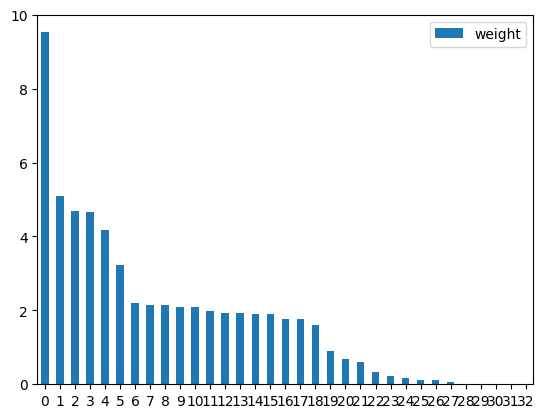

In [18]:
ax_weights = weights.plot.bar(y=weights.columns[-1], rot=0)

### petrinet.py

In [19]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [20]:
import os
import pandas as pd
import pygraphviz as pgv

# -----------------------------------------------------------------------------

fname = 'reactions.csv'
print('Reading:', fname)
reactions = pd.read_csv(folder+fname, index_col='reaction')

# -----------------------------------------------------------------------------

fname = 'weights.csv'
print('Reading:', fname)
weights = pd.read_csv(folder+fname, index_col='reaction')

# -----------------------------------------------------------------------------

G = pgv.AGraph(name='reactions',
               directed=True,
               strict=False,
               splines='ortho',
               forcelabels=True,
               nodesep=0.25)

# -----------------------------------------------------------------------------

for species in reactions.columns:
    G.add_node(species, label=species, fontsize=18,  xlabel='', shape='circle',
               fixedsize=True, width=1.25, height=1.25)

# -----------------------------------------------------------------------------
count = 0
color_1 = 'blue'
color_2 = 'orange'

nodes_to_keep = set()


for reaction in reactions.index:
    print(reaction)
    weight = weights.loc[reaction]['weight']
    print(weight)
    if weight > 0:
        count += 1
        color = color_1
    else:
        color = color_2

    print(color)

    G.add_node(reaction, label='', xlabel='',
               shape='rectangle', style='filled',
               fixedsize=True, width=0.25, height=1.25,
               fillcolor=color, color=color)

    for species in reactions.columns:
        value = reactions.loc[reaction,species]
        if value > 0.:
            G.add_edge(reaction, species, color=color)
            if weight > 0.:
                nodes_to_keep.add(species)
        if value < 0.:
            G.add_edge(species, reaction, color=color)
            if weight > 0.:
                nodes_to_keep.add(species)

# -----------------------------------------------------------------------------

for species in reactions.columns:
    if species in nodes_to_keep:
        G.get_node(species).attr['color'] = color_1
    else:
        G.get_node(species).attr['color'] = "red"
        G.get_node(species).attr['style'] = 'filled'
        print('Warning: dangling species', species)

# -----------------------------------------------------------------------------

fdot = 'petrinet.dot'
print('Writing:', fdot)
G.write(fdot)

# -----------------------------------------------------------------------------

ext = 'pdf'
fout = 'petrinet.' + ext
command = 'dot -T%s %s > %s' % (ext, fdot, fout)

print('Running:', command)
os.system(command)

print('Deleting:', fdot)
os.remove(fdot)



Reading: reactions.csv
Reading: weights.csv
e + Ar(1S0) -> e + Ar(3P2)
2.1998304350243645
blue
e + Ar(1S0) <- e + Ar(3P2)
0.3320411887116694
blue
e + Ar(1S0) -> e + Ar(3P1)
1.8974286191964695
blue
e + Ar(1S0) <- e + Ar(3P1)
0.172985226732689
blue
e + Ar(1S0) -> e + Ar(3P0)
4.66252155052605
blue
e + Ar(1S0) <- e + Ar(3P0)
2.144286705040162
blue
e + Ar(1S0) -> e + Ar(1P1)
2.0940838918206706
blue
e + Ar(1S0) <- e + Ar(1P1)
1.6058769131590058
blue
e + Ar(3P2) -> e + Ar(3P1)
0.0001201885169524
blue
e + Ar(3P2) <- e + Ar(3P1)
2.133184470458826
blue
e + Ar(3P2) -> e + Ar(3P0)
3.217298042623027
blue
e + Ar(3P2) <- e + Ar(3P0)
1.92729778469422
blue
e + Ar(3P2) -> e + Ar(1P1)
0.8990328985665115
blue
e + Ar(3P2) <- e + Ar(1P1)
4.694185722101087
blue
e + Ar(3P1) -> e + Ar(3P0)
1.903669188859653
blue
e + Ar(3P1) <- e + Ar(3P0)
0.0021155120963722
blue
e + Ar(3P1) -> e + Ar(1P1)
1.9813743240117976
blue
e + Ar(3P1) <- e + Ar(1P1)
1.9415100501636464
blue
e + Ar(3P0) -> e + Ar(1P1)
0.6927049219616731
bl